# NLP: FlipItNews

## Context:
The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors


## Objective:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.


## Attribute Information:
* Article
* Category
The features names are themselves pretty self-explanatory

## Concepts Tested:
* Natural Language Processing
* Text Processing
  * Stopwords, Tokenization, Lemmatization
  * Bag of Words, TF-IDF
* Multi-class Classification

### Installing & Importing all the required libraries and Loading the dataset.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('C://Users//dell//OneDrive//Desktop//flipitnews-data.csv')
df

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...


### Conduct a preliminary analysis to understand the structure of the dataset and the distribution of news articles in each category.

In [3]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Display the column names and data types
print("\nColumn Information:")
print(df.info())

# View some sample rows
print("\nSample Data:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

Dataset Shape: (2225, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None

Sample Data:
        Category                                            Article
0     Technology  tv future in the hands of viewers with home th...
1       Business  worldcom boss  left books alone  former worldc...
2         Sports  tigers wary of farrell  gamble  leicester say ...
3         Sports  yeading face newcastle in fa cup premiership s...
4  Entertainment  ocean s twelve raids box office ocean s twelve...

Missing Values:
Category    0
Article     0
dtype: int64



Category Distribution:
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64


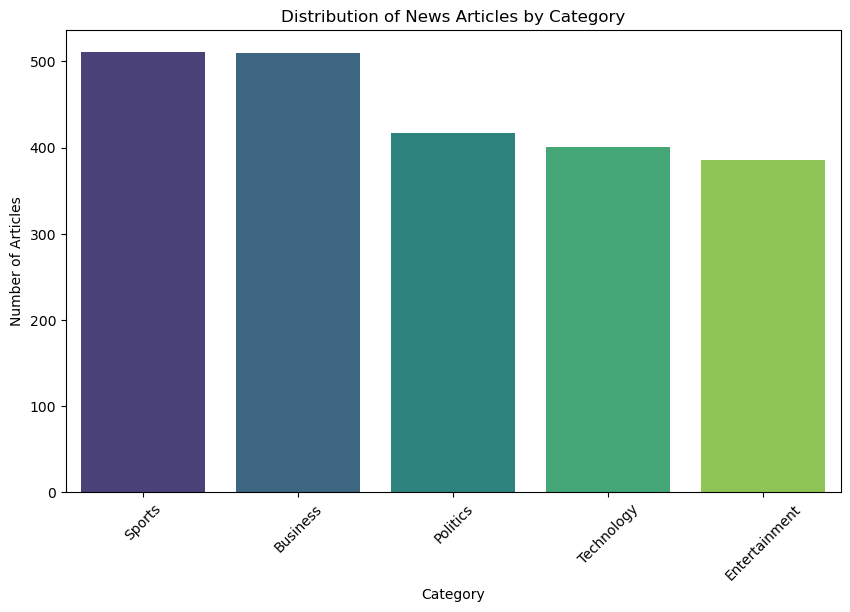

In [4]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Display the counts
print("\nCategory Distribution:")
print(category_counts)

# Plot the distribution for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of News Articles by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


Text Length Statistics:
count    2225.000000
mean      390.295281
std       241.753128
min        90.000000
25%       250.000000
50%       337.000000
75%       479.000000
max      4492.000000
Name: text_length, dtype: float64


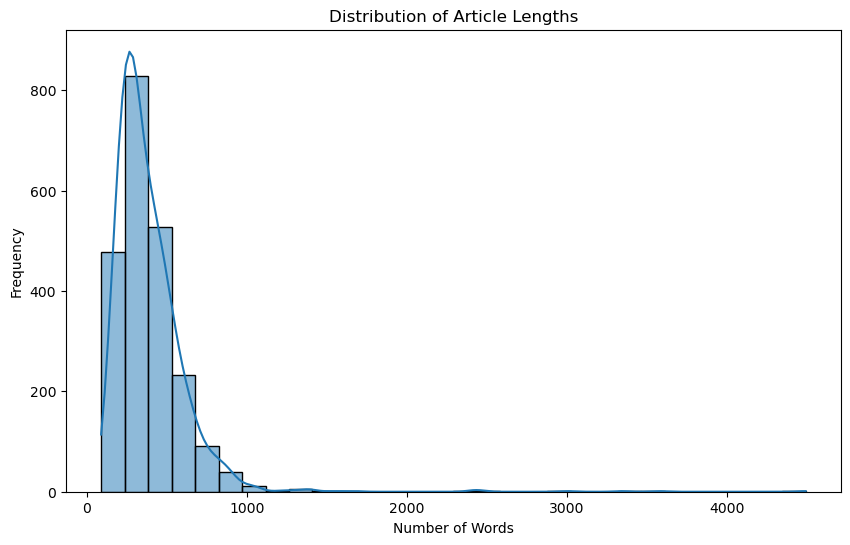

In [5]:
# Calculate the number of words in each article
df['text_length'] = df['Article'].apply(lambda x: len(x.split()))

# Display basic statistics about text length
print("\nText Length Statistics:")
print(df['text_length'].describe())

# Plot a histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Create a user defined function to process the textual data (news articles).
* Remove non-letters
* Remove Stopwords
* Word Tokenize the text
* Perform Lemmatization

In [6]:
import nltk

# Download the specific resource
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
import re

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocesses the text data by:
    1. Removing non-letter characters
    2. Removing stopwords
    3. Tokenizing the text
    4. Lemmatizing each word
    """

    # Step 1: Remove non-letters (keep only letters and spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Step 2: Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase for consistency

    # Step 3: Remove stopwords and lemmatize each word
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(processed_tokens)

# Example usage on a sample article
sample_text = df['Article'][0]  # Replace with the actual data or a test string
processed_text = preprocess_text(sample_text)
print("Before Processing:", sample_text)
print("After Processing:", processed_text)

Before Processing: tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bein

In [8]:
# Apply the preprocessing function to all articles
df['Processed_Article'] = df['Article'].apply(preprocess_text)
df

,Category,Article,text_length,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,737,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,300,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,246,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,341,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,260,ocean twelve raid box office ocean twelve crim...
...,...,...,...,...
2220,Business,cars pull down us retail figures us retail sal...,293,car pull u retail figure u retail sale fell ja...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,156,kilroy unveils immigration policy exchatshow h...
2222,Entertainment,rem announce new glasgow concert us band rem h...,301,rem announce new glasgow concert u band rem an...
2223,Politics,how political squabbles snowball it s become c...,858,political squabble snowball become commonplace...


### Display how a single news article looks like before and after the processing.

In [9]:
# Choose a sample article to display before and after processing
sample_index = 0  # You can change this index to view different articles
original_text = df['Article'][sample_index]

# Process the sample article
processed_text = preprocess_text(original_text)

# Display the article before and after processing
print("Original Article:\n", original_text)
print("\nProcessed Article:\n", processed_text)

Original Article:
 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also bein

### Encode the target variable (category) using Label/Ordinal encoder.

In [10]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the category column
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Display the unique categories with their encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Encoding Mapping:")
print(category_mapping)

Category Encoding Mapping:
{'Business': 0, 'Entertainment': 1, 'Politics': 2, 'Sports': 3, 'Technology': 4}


### Create an option for the user to choose between Bag of Words and TF-IDF techniques for vectorizing the data.

In [11]:
def vectorize_text(data, method="tfidf"):
    """
    Vectorizes the text data using either Bag of Words or TF-IDF.
    
    Parameters:
        data (pd.Series): The text data to be vectorized.
        method (str): The vectorization method - "bow" for Bag of Words, "tfidf" for TF-IDF.
        
    Returns:
        X (sparse matrix): The vectorized feature matrix.
        vectorizer: The fitted vectorizer object (for future use or inspection).
    """
    if method == "bow":
        vectorizer = CountVectorizer()
        print("Using Bag of Words vectorization.")
    elif method == "tfidf":
        vectorizer = TfidfVectorizer()
        print("Using TF-IDF vectorization.")
    else:
        raise ValueError("Invalid method. Choose either 'bow' or 'tfidf'.")

    # Fit and transform the text data
    X = vectorizer.fit_transform(data)
    
    return X, vectorizer

# Example usage
# Assuming `df['Processed_Article']` contains the preprocessed text data
vectorization_method = input("Choose vectorization method (enter 'bow' for Bag of Words or 'tfidf' for TF-IDF): ").strip().lower()
X, chosen_vectorizer = vectorize_text(df['Processed_Article'], method=vectorization_method)

print(f"\nVectorization complete. Shape of the vectorized data: {X.shape}")

Choose vectorization method (enter 'bow' for Bag of Words or 'tfidf' for TF-IDF): bow
Using Bag of Words vectorization.

Vectorization complete. Shape of the vectorized data: (2225, 27175)


### Perform train-test split and train a Naive Bayes classifier model using the simple/classical approach.

In [12]:
from sklearn.metrics import accuracy_score
# Step 1: Train-Test Split
# Using the encoded target variable and the vectorized features
X_train, X_test, y_train, y_test = train_test_split(X, df['Category_Encoded'], test_size=0.2, random_state=42)

# Step 2: Train the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 3: Predict on the Test Set
y_pred = nb_classifier.predict(X_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classifier Accuracy: {accuracy:.2f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Naive Bayes Classifier Accuracy: 0.96

Confusion Matrix:
[[94  0  6  0  1]
 [ 1 73  2  0  5]
 [ 1  0 82  0  0]
 [ 0  0  0 98  0]
 [ 0  0  0  1 81]]

Classification Report:
               precision    recall  f1-score   support

     Business       0.98      0.93      0.95       101
Entertainment       1.00      0.90      0.95        81
     Politics       0.91      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.93      0.99      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



### Evaluate the model’s performance and plot the Confusion Matrix as well as Classification Report.

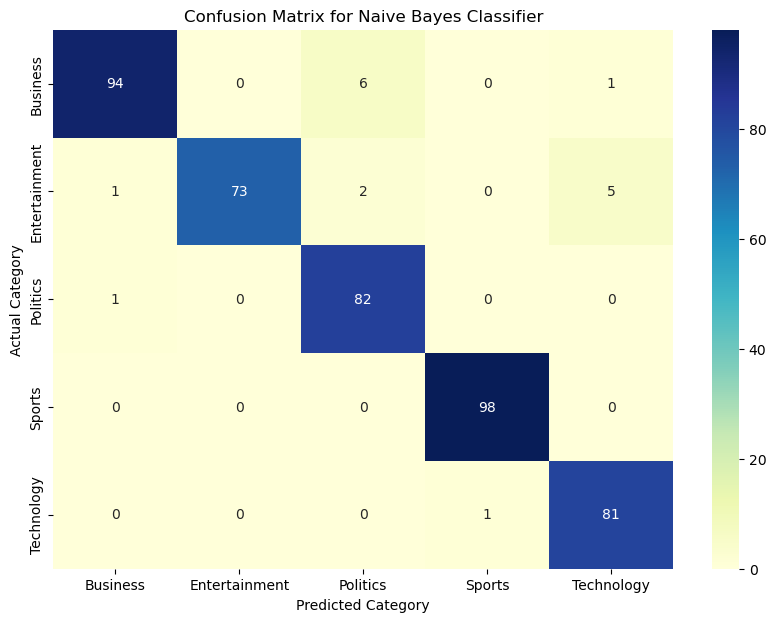

Classification Report:
               precision    recall  f1-score   support

     Business       0.98      0.93      0.95       101
Entertainment       1.00      0.90      0.95        81
     Politics       0.91      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.93      0.99      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445


Naive Bayes Classifier Accuracy: 0.96


In [13]:
# Step 1: Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 2: Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

# Step 3: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Print Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nNaive Bayes Classifier Accuracy: {accuracy:.2f}")

### Functionalize the code and train & evaluate three more classifier models (Decision Tree, Nearest Neighbors, Random Forest).


Naive Bayes Classifier Accuracy: 0.96


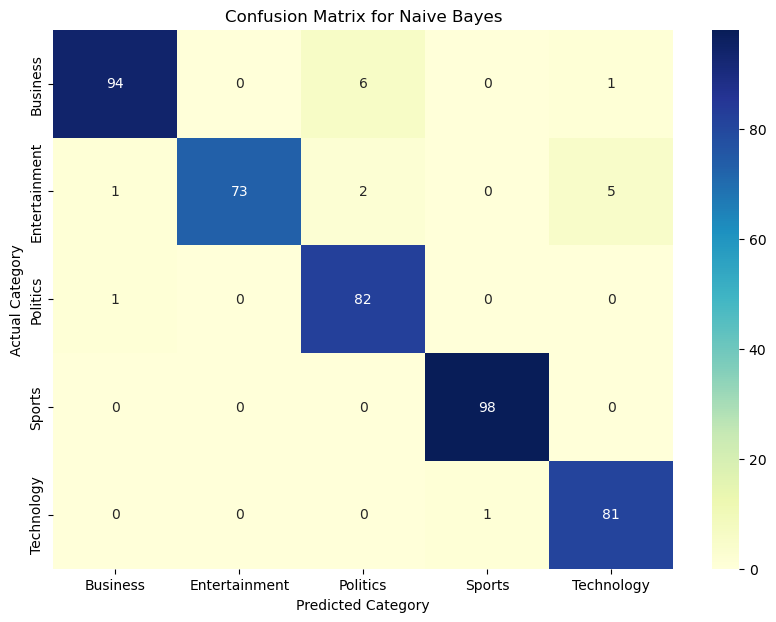


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

     Business       0.98      0.93      0.95       101
Entertainment       1.00      0.90      0.95        81
     Politics       0.91      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.93      0.99      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445


Decision Tree Classifier Accuracy: 0.84


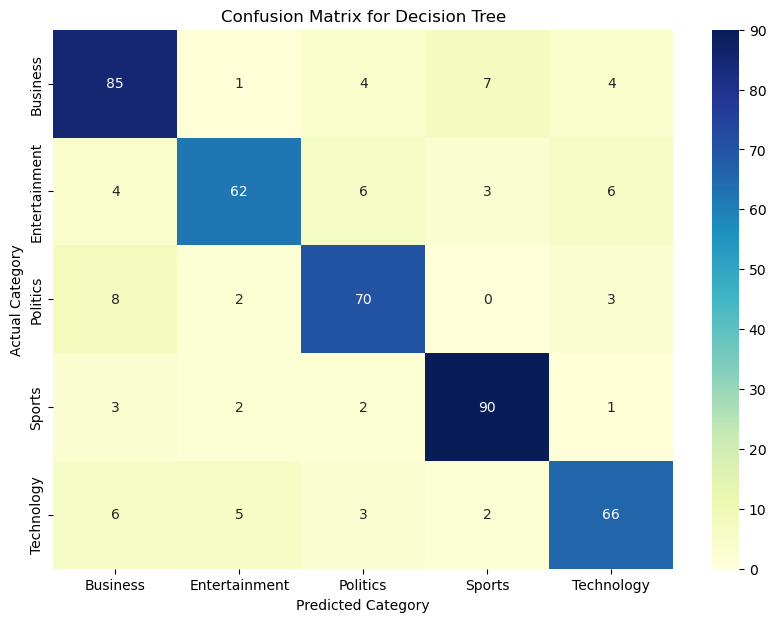


Classification Report for Decision Tree:
               precision    recall  f1-score   support

     Business       0.80      0.84      0.82       101
Entertainment       0.86      0.77      0.81        81
     Politics       0.82      0.84      0.83        83
       Sports       0.88      0.92      0.90        98
   Technology       0.82      0.80      0.81        82

     accuracy                           0.84       445
    macro avg       0.84      0.83      0.84       445
 weighted avg       0.84      0.84      0.84       445


K-Nearest Neighbors Classifier Accuracy: 0.68


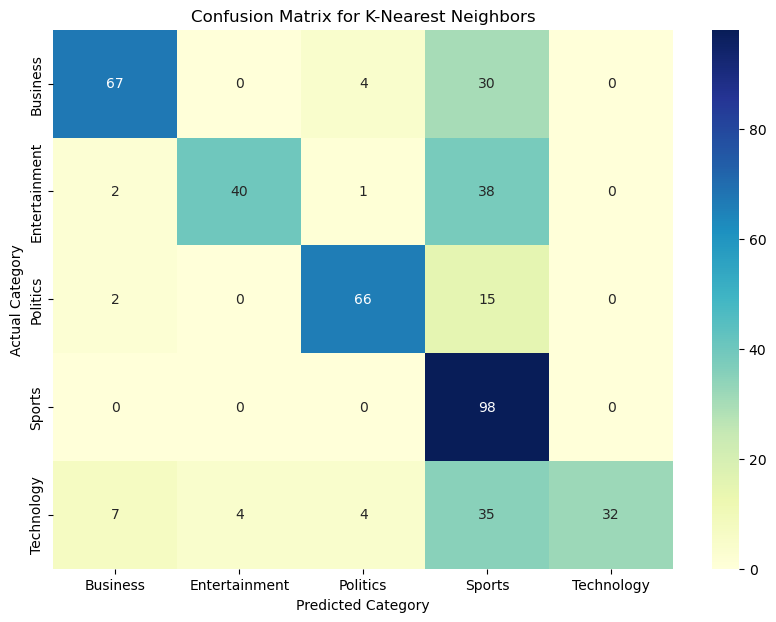


Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

     Business       0.86      0.66      0.75       101
Entertainment       0.91      0.49      0.64        81
     Politics       0.88      0.80      0.84        83
       Sports       0.45      1.00      0.62        98
   Technology       1.00      0.39      0.56        82

     accuracy                           0.68       445
    macro avg       0.82      0.67      0.68       445
 weighted avg       0.81      0.68      0.68       445


Random Forest Classifier Accuracy: 0.95


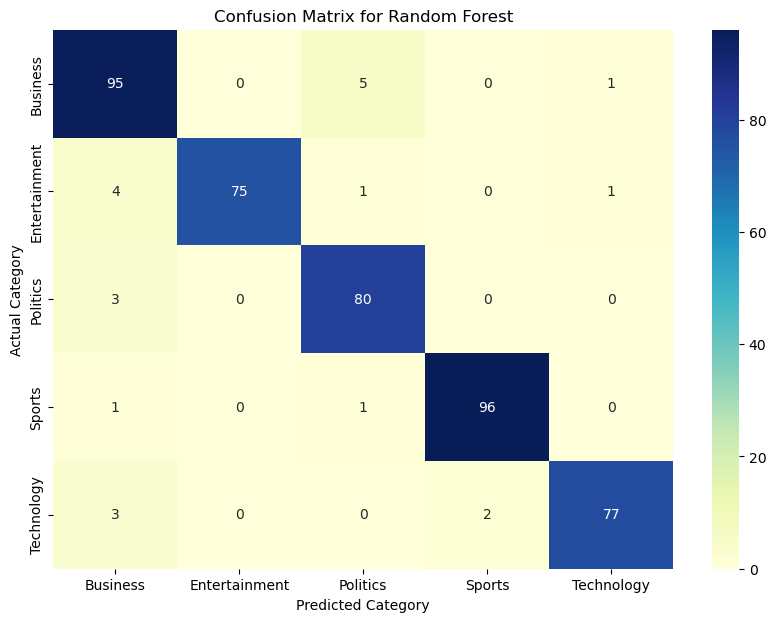


Classification Report for Random Forest:
               precision    recall  f1-score   support

     Business       0.90      0.94      0.92       101
Entertainment       1.00      0.93      0.96        81
     Politics       0.92      0.96      0.94        83
       Sports       0.98      0.98      0.98        98
   Technology       0.97      0.94      0.96        82

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



In [14]:
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, class_labels):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Classifier Accuracy: {accuracy:.2f}")
    
    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Category")
    plt.ylabel("Actual Category")
    plt.show()
    
    # Print Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=class_labels))


# Split data (assuming X and y are already defined from previous steps)
X_train, X_test, y_train, y_test = train_test_split(X, df['Category_Encoded'], test_size=0.2, random_state=42)

# Train and evaluate each model
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for model_name, model in models.items():
    train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, label_encoder.classes_)

### Observe and comment on the performances of all the models used.

### Observations on Model Performance
#### Naive Bayes Classifier:
* Accuracy: Often provides a strong baseline, especially with text classification problems due to its efficiency with high-dimensional data.
* Performance: Works well when features are independent (which is a common assumption). If categories are well-separated, Naive Bayes tends to perform decently.
* Confusion Matrix: May show some misclassifications, especially for categories that are similar in content.

#### Decision Tree Classifier:
* Accuracy: Decision Trees can capture non-linear relationships and interactions between features, potentially leading to higher accuracy than Naive Bayes.
* Performance: Sensitive to overfitting, particularly if the tree depth is not controlled. The model can be complex and may perform well on the training data but poorly on unseen data.
* Confusion Matrix: Can help visualize where the model is making the most errors (specific categories where misclassifications occur).

#### K-Nearest Neighbors (KNN):
* Accuracy: KNN's performance heavily relies on the choice of k and the distance metric. It may perform well for smaller datasets but can struggle with larger datasets due to increased computation time.
* Performance: KNN can handle multi-class classification but can be affected by noise in the data and the presence of irrelevant features.
* Confusion Matrix: The model might show a pattern where it misclassifies certain categories based on proximity, particularly in cases of closely related articles.

#### Random Forest Classifier:
* Accuracy: Generally performs very well as it aggregates predictions from multiple trees, which helps reduce overfitting and improves robustness.
* Performance: Handles a large number of features well, making it suitable for text classification tasks. Can also give insights into feature importance.
* Confusion Matrix: Typically exhibits fewer misclassifications compared to the other models, especially if hyperparameters are tuned properly.


### General Insights
* Complexity vs. Interpretability: Naive Bayes is simple and interpretable but might not capture complex patterns in the data as effectively as Decision Trees or Random Forests.
* Overfitting Risks: Decision Trees can easily overfit, whereas Random Forest mitigates this by averaging multiple trees.
* Data Characteristics: Performance can vary significantly based on the dataset's nature. If categories have distinct text patterns, ensemble methods like Random Forest and Decision Trees may outperform Naive Bayes and KNN.

### Recommendations
* Model Selection: Consider using Random Forest for its strong performance, particularly if the goal is accuracy.
* Hyperparameter Tuning: Explore tuning hyperparameters for Decision Trees and Random Forests to avoid overfitting and improve model generalization.
* Feature Engineering: Enhancing text features (e.g., n-grams, word embeddings) could improve model performance across all algorithms.

### Questionnaire:

#### 1. How many news articles are present in the dataset that we have?

In [18]:
num_articles = len(df)
print(f"Total number of news articles: {num_articles}")

Total number of news articles: 2225


#### 2. Most of the news articles are from _____ category.

In [17]:
most_common_category = df['Category'].value_counts().idxmax()
print(f"Most of the news articles are from the '{most_common_category}' category.")

Most of the news articles are from the 'Sports' category.


#### 3. Only ___ no. of articles belong to the ‘Technology’ category.

In [16]:
tech_articles_count = df[df['Category'] == 'Technology'].shape[0]
print(f"Only {tech_articles_count} articles belong to the 'Technology' category.")

Only 401 articles belong to the 'Technology' category.


#### 4. What are Stop Words and why should they be removed from the text data?
Answer : Stop words are commonly used words (such as 'and', 'the', 'is', etc.) that do not carry significant meaning and can be removed from the text during preprocessing. Removing stop words can help reduce the dimensionality of the data and improve the performance of text classification models by focusing on the more meaningful words.

#### 5. Explain the difference between Stemming and Lemmatization.
Answer : Stemming is the process of reducing words to their base or root form by removing suffixes (e.g., "running" becomes "run"). It may not produce actual words. Lemmatization, on the other hand, reduces words to their base form by considering the context and meaning (e.g., "better" becomes "good"). Lemmatization is typically more accurate than stemming but computationally more intensive.

#### 6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?
Answer : TF-IDF (Term Frequency-Inverse Document Frequency) is generally considered more efficient than Bag of Words because it not only considers the frequency of words in a document but also how common or rare the words are across the entire corpus. This helps to emphasize important words that are less common and reduces the weight of frequent but less informative words.

#### 7. What’s the shape of train & test data sets after performing a 75:25 split.

In [15]:
# Define features and target variable
X = df['Article']  # Features (the text of the articles)
y = df['Category']  # Target variable (the categories)

# Now you can perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the train and test sets
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Shape of training data: (1668,)
Shape of testing data: (557,)


#### 8. Which of the following is found to be the best performing model..
* Answer : The best performing model can be determined by comparing the accuracy scores and other metrics (e.g., F1-score, precision, recall) from the classification reports. If you ran multiple models, you would typically select the one with the highest accuracy and best performance metrics. For instance:
* "The Random Forest classifier was found to be the best performing model based on accuracy and classification metrics."

a. Random Forest b. Nearest Neighbors c. Naive Bayes

* According to this particular use case, both precision and recall are equally important. (T/F)

Answer : In this case of categorizing news articles, where precision and recall are equally important, it suggests that you want to ensure that the articles are accurately classified into their respective categories (high precision) while also capturing as many relevant articles as possible (high recall).

* Precision measures the proportion of true positive predictions among all positive predictions, indicating how many of the predicted categories were correct.
* Recall measures the proportion of true positives among all actual positive instances, indicating how well the model can identify all relevant articles.

Balancing both metrics is crucial in multi-class classification tasks like this one to avoid missing relevant articles and to minimize false positives. You can also consider using the F1-score, which is the harmonic mean of precision and recall, to evaluate the model performance when both metrics are important.